# Numerical analysis of ergodicity of 1D potentials thermostatted using the DD algorithm

## Harmonic Oscillator

In [1]:
using PyPlot
using PyCall
@pyimport matplotlib as mpl
mpl.style[:use]("classic")

In [2]:
file1 = "zsectionWWHvHO"
file2 = "psectionWWHvHO"
s1 = readdlm("../poincaredata/sectionsandtrajectories/$file1")
s2 = readdlm("../poincaredata/sectionsandtrajectories/$file2");

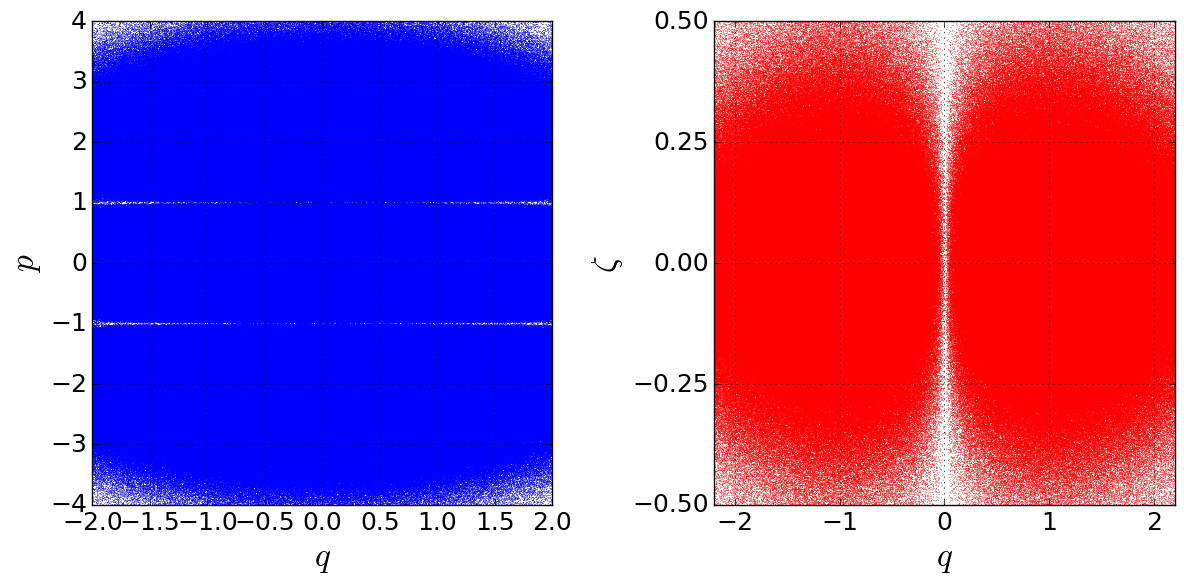

In [3]:
fig = plt[:figure](figsize=(12,6))   
#fig[:subplots_adjust](hspace=.3)

ax = fig[:add_subplot](1,2,1)                                                      
ticks = collect(-5.0:1.0:5.0)
ax[:set_yticks](ticks)
ax[:grid](which="both")
ax[:plot](s1[:,1], s1[:,2], "b.", ms=0.5, alpha = 0.5)

ax[:set_xlim](-2.,2.0)
ax[:set_ylim](-4.,4.)
ax[:set_xlabel](L"$q$", fontsize = 24)
ax[:set_ylabel](L"$p$", fontsize = 24)
ax[:tick_params](axis="both", labelsize=18)
#ax[:text](-1.7, 3.5, L"$\zeta = 0$", fontsize=15)

ax2 = fig[:add_subplot](1,2,2)                                                      
ticks = collect(-0.5:0.25:0.5)
ax2[:set_yticks](ticks)
ax2[:grid](which="both")
ax2[:plot](s2[:,1], s2[:,2], "r.", ms=0.5, alpha = 0.5)

ax2[:set_xlim](-2.2,2.2)
ax2[:set_ylim](-0.5,0.5)
ax2[:set_xlabel](L"$q$", fontsize = 24)
ax2[:set_ylabel](L"$\zeta$", fontsize = 24)
ax2[:tick_params](axis="both", labelsize=18)

#ax2[:text](0.0, 0.4, L"$p = 0$", fontsize=15)

plt[:tight_layout]()

plt[:savefig]("../plots/$file1.png")

In [3]:
size(s1), size(s2)

((30241185,2),(3981202,2))

In [3]:
using KernelDensity
@pyimport matplotlib.cm as cm

In [4]:
k1 = kde((s1));

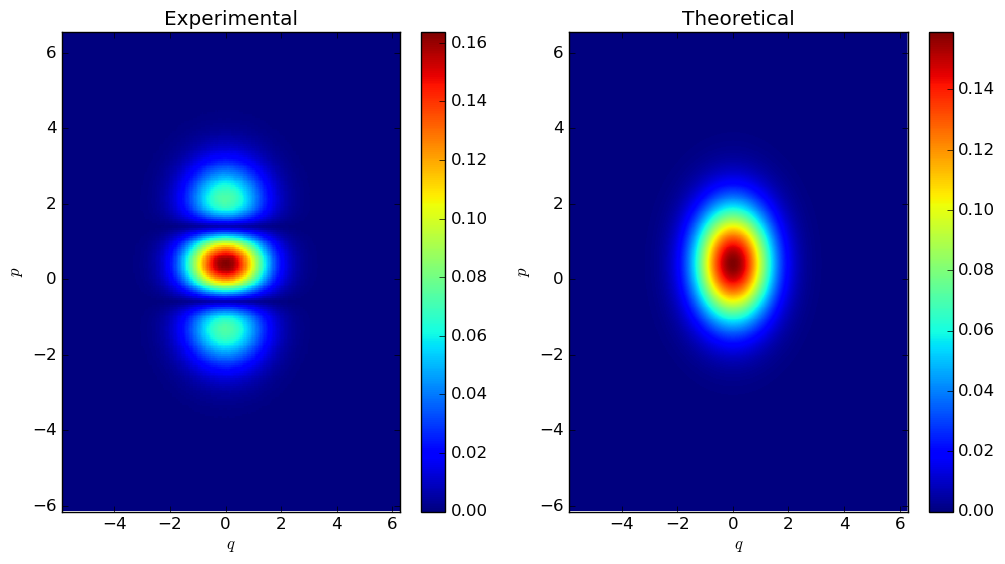

PyObject <matplotlib.colorbar.Colorbar object at 0x7fc6469ab290>

In [10]:
fig = plt[:figure](figsize=(12,6))   

ax = fig[:add_subplot](1,2,1) 
im = ax[:imshow](k1.density', interpolation = "none", extent =(k1.x[1],k1.x[end], k1.y[1],k1.y[end]), aspect = "auto")
ax[:set_xlabel](L"q")
ax[:set_ylabel](L"p")
ax[:set_title]("Experimental")
fig[:colorbar](im, orientation="vertical")

##Distribución teórica
t1 = [exp(-q^2/2.)*exp(-p^2./2)/(2*pi) for q in linspace(k1.x[1],k1.x[end],1000), p in linspace(k1.y[1],k1.y[end],1000)];

ax = fig[:add_subplot](1,2,2) 
im = ax[:imshow](t1,interpolation = "none",extent =(k1.x[1],k1.x[end], k1.y[1],k1.y[end]), aspect = "auto")
ax[:set_xlabel](L"q")
ax[:set_ylabel](L"p")
ax[:set_title]("Theoretical")
fig[:colorbar](im, orientation="vertical")


In [8]:
k2 = kde((s2));

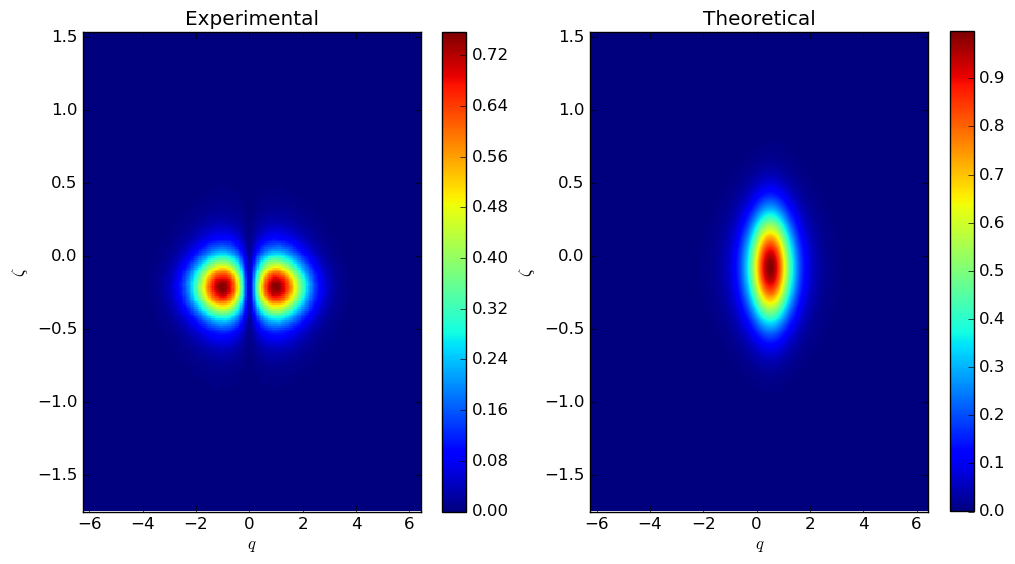

PyObject <matplotlib.colorbar.Colorbar object at 0x7fc6466ed510>

In [11]:
fig = plt[:figure](figsize=(12,6))   

ax = fig[:add_subplot](1,2,1) 
im = ax[:imshow](k2.density', interpolation = "none", extent =(k2.x[1],k2.x[end], k2.y[1],k2.y[end]), aspect = "auto")
ax[:set_xlabel](L"q")
ax[:set_ylabel](L"\zeta")
ax[:set_title]("Experimental")
fig[:colorbar](im, orientation="vertical")
Q = 0.1
##Distribución teórica
t1 = [exp(-q^2/2.)/sqrt(2*pi)*exp(z/Q)/(Q*(1+exp(z/Q))^2) for q in linspace(k2.x[1],k2.x[end],1000), z in 
    linspace( k2.y[1],k2.y[end],1000)];

ax = fig[:add_subplot](1,2,2) 
im = ax[:imshow](t1,interpolation = "none",extent =(k2.x[1],k2.x[end], k2.y[1],k2.y[end]), aspect = "auto")
ax[:set_xlabel](L"q")
ax[:set_ylabel](L"\zeta")
ax[:set_title]("Theoretical")
fig[:colorbar](im, orientation="vertical")
